<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Finance" data-toc-modified-id="Finance-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Finance</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Modern-Portfolio-Theory" data-toc-modified-id="Modern-Portfolio-Theory-1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>Modern Portfolio Theory</a></span></li><li><span><a href="#Linear-&amp;-Quadratic-Programming" data-toc-modified-id="Linear-&amp;-Quadratic-Programming-1.0.2"><span class="toc-item-num">1.0.2&nbsp;&nbsp;</span>Linear &amp; Quadratic Programming</a></span></li><li><span><a href="#Technical-Analysis" data-toc-modified-id="Technical-Analysis-1.0.3"><span class="toc-item-num">1.0.3&nbsp;&nbsp;</span>Technical Analysis</a></span></li></ul></li></ul></li><li><span><a href="#Machine-Learning" data-toc-modified-id="Machine-Learning-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Machine Learning</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Principal-component-analysis-(PCA)" data-toc-modified-id="Principal-component-analysis-(PCA)-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>Principal component analysis (PCA)</a></span></li><li><span><a href="#Monte-Carlo-Simulation" data-toc-modified-id="Monte-Carlo-Simulation-2.0.2"><span class="toc-item-num">2.0.2&nbsp;&nbsp;</span>Monte Carlo Simulation</a></span></li><li><span><a href="#Clustering-with-KMeans" data-toc-modified-id="Clustering-with-KMeans-2.0.3"><span class="toc-item-num">2.0.3&nbsp;&nbsp;</span>Clustering with KMeans</a></span><ul class="toc-item"><li><span><a href="#KMeans-on-Haidt's-Dataset" data-toc-modified-id="KMeans-on-Haidt's-Dataset-2.0.3.1"><span class="toc-item-num">2.0.3.1&nbsp;&nbsp;</span>KMeans on Haidt's Dataset</a></span></li><li><span><a href="#Haidt-(day-2)" data-toc-modified-id="Haidt-(day-2)-2.0.3.2"><span class="toc-item-num">2.0.3.2&nbsp;&nbsp;</span>Haidt (day 2)</a></span></li><li><span><a href="#Haidt-(day-3)" data-toc-modified-id="Haidt-(day-3)-2.0.3.3"><span class="toc-item-num">2.0.3.3&nbsp;&nbsp;</span>Haidt (day 3)</a></span></li></ul></li><li><span><a href="#NLP---Carbuying-Forum" data-toc-modified-id="NLP---Carbuying-Forum-2.0.4"><span class="toc-item-num">2.0.4&nbsp;&nbsp;</span>NLP - Carbuying Forum</a></span></li><li><span><a href="#Regression" data-toc-modified-id="Regression-2.0.5"><span class="toc-item-num">2.0.5&nbsp;&nbsp;</span>Regression</a></span></li><li><span><a href="#simple-Neural-Net" data-toc-modified-id="simple-Neural-Net-2.0.6"><span class="toc-item-num">2.0.6&nbsp;&nbsp;</span>simple Neural Net</a></span></li><li><span><a href="#K-Nearest-Neighbors" data-toc-modified-id="K-Nearest-Neighbors-2.0.7"><span class="toc-item-num">2.0.7&nbsp;&nbsp;</span>K-Nearest Neighbors</a></span></li></ul></li></ul></li></ul></div>

Abstract: These are my personal Python notes which i) illustrate my competencies and programming style and ii) serve as a useful resource for me as I continue to practice and improve at software development. It's compiled from the independent programming projects I've tinkered with since finishing at University of Waterloo in April '22; projects I've worked on to bridge the gap between my relatively strong mathematics background and my (admittedly weaker) background in software development.

It's possible these notes may be unpolished in a few sections. I'm writing this on 2022-07-07 and I plan to publish them very soon; as some jobs I'd like to apply to have deadlines coming up, and I'm hoping this project can demonstrate to employers that I can develop readable and scalable software. By the middle of July everything in this .ipynb will be clear, well organized, and will follow best practices.

# Finance

### Modern Portfolio Theory

Consider a portfolio with mean asset return $\mu_i$ for $i \in (1, ..., n)$ and covariance between returns of $i$ and $j$ denoted by $\Sigma$, which we assume to be symmetric and positive semidefinite (and positive definite when specified).

Portfolio return and variance is
$$\mu_{p}=\mu^{\prime} x \text { and } \sigma_{p}^{2}=x^{\prime} \Sigma x$$
for a given $x \in \mathbb{R}^n$ representing weights of each asset in the portfolio.

The goal is to select $x$ subject to the budget constraint $\mathbb{1}^{\prime} x = 1$ and non-negativity constraint $x \geq \mathbb{0}$ that gives large $\mu_{p}$ and small $\sigma_p^2$.

In [1]:
import pandas_datareader as pdr

tickers = ['msft', 'tqqq', 'tsla', 'spy', 'aapl', 'f', 'twtr', 'ibm']
NoA = len(tickers)

df = pdr.DataReader(tickers, data_source='yahoo', start='2017-01-01', end='2020-09-28')['Adj Close']

In [2]:
import numpy as np

dfret = df.pct_change().dropna()
display((dfret).head(3))
arr = dfret.to_numpy()
corr_df = dfret.corr(method='pearson')

Symbols,msft,tqqq,tsla,spy,aapl,f,twtr,ibm
Date,,,,,,,,
2017-01-04,-0.004474,0.017036,0.046085,0.005949,-0.001119,0.046068,0.025547,0.012381
2017-01-05,0.000000,0.017732,-0.001057,-0.000795,0.005085,-0.030372,0.013642,-0.003309
2017-01-06,0.008668,0.025356,0.009967,0.003578,0.011148,-0.000783,0.004681,0.004920


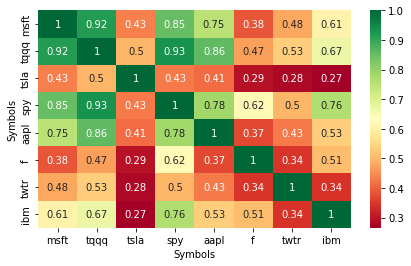

In [3]:
import seaborn
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 4))
seaborn.heatmap(corr_df, annot=True, cmap='RdYlGn')
plt.show()

$\Sigma = [\sigma_{i j}] = [\sigma_i \sigma_j \rho_{i j}]$

$\rho = \left[\begin{array}{cccccccc}
1 & 0.92 & 0.43 & 0.85 & 0.75 & 0.38 & 0.48 & 0.61 \\
0.92 & 1 & 0.5 & 0.93 & 0.86 & 0.47 & 0.53 & 0.67 \\
0.43 & 0.5 & 1 & 0.43 & 0.41 & 0.29 & 0.28 & 0.27 \\
0.85 & 0.93 & 0.43 & 1 & 0.78 & 0.62 & 0.5 & 0.76 \\
0.75 & 0.86 & 0.41 & 0.78 & 1 & 0.37 & 0.43 & 0.53 \\
0.38 & 0.47 & 0.29 & 0.62 & 0.37 & 1 & 0.34 & 0.51 \\
0.48 & 0.53 & 0.28 & 0.5 & 0.43 & 0.34 & 1 & 0.34 \\
0.61 & 0.67 & 0.27 & 0.76 & 0.53 & 0.51 & 0.34 & 1
\end{array}\right]$

We will simulate $10,000$ random portfolios by defining a random $10,000 \times 8$ array (namely rand2d) such that each row sums to $1$.

In [4]:
np.random.seed(0)

rand2d = np.random.random((10000,NoA))
rand2d = rand2d/rand2d.sum(axis=1,keepdims=1)

We can calculate portfolio returns and standard deviations with these formulae:

$\mathrm{E}\left(R_{p}\right)=\sum_{i} w_{i} \mathrm{E}\left(R_{i}\right)$

$\sigma_{p}^{2}=\sum_{j, i} w_{i} w_{j} \sigma_{i} \sigma_{j} \rho_{i j}=\sum_{i} w_{i}^{2} \sigma_{i}^{2}+\sum_{i} \sum_{j \neq i} w_{i} w_{j} \sigma_{i} \sigma_{j} \rho_{i j}$, since $\rho_{i i} = 1$

Additionally we need to multiply by the number of trading days in a year to define yearly paramaters rather than daily.

In [5]:
retSimulated = rand2d.dot(dfret.mean())*252
volSimulated = np.sqrt(np.diag(rand2d@(dfret.cov() * 252@rand2d.T)))

We define the risk free rate to be $0$, and the Sharpe ratio calculation is thus $\frac{R_p}{\sigma_p}$.

In [6]:
sharpeSimulated = retSimulated / volSimulated

Now we can plot the graph - along with the highest sharpe ratio portfolio and lowest variance portfolio denoted with stars.

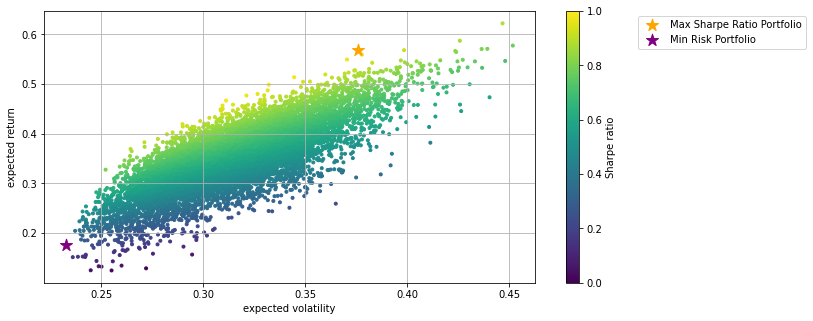

In [7]:
sharpeSimulated = retSimulated / volSimulated

plt.figure(figsize=(11, 5))
plt.scatter(volSimulated, retSimulated, c=sharpeSimulated, marker='.')
plt.grid(True)

max_sr_vol = volSimulated[np.argmax(sharpeSimulated)]
max_sr_ret = retSimulated[np.argmax(sharpeSimulated)]

min_ri_vol = volSimulated[np.argmin(volSimulated)]
min_ri_ret = retSimulated[np.argmin(volSimulated)]


plt.scatter(max_sr_vol, max_sr_ret, c="orange", marker='*',
            s=160, label="Max Sharpe Ratio Portfolio")

plt.scatter(min_ri_vol, min_ri_ret, c="purple",
            s=160, marker='*', label="Min Risk Portfolio")


plt.legend(loc='upper left', bbox_to_anchor=(1.2, 1))

plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')
plt.show()

The optimization equation that we will use to model the frontier in the next cell is taken from here: https://github.com/cantaro86/Financial-Models-Numerical-Methods/blob/master/7.1%20Classical%20MVO.ipynb

In [8]:
from scipy.optimize import Bounds, LinearConstraint, minimize

def optimizer(MU, COV, target_mu, OnlyLong=True):
    """ Finds optimal weights for a fixed target portfolio return """
    
    N = len(MU)
    if OnlyLong == True:
        bounds = Bounds(0, 1)
    A = np.vstack( (np.ones(N), MU) )
    B = np.array([1,target_mu])
    linear_constraint = LinearConstraint( A, B, B)
    
    weights = np.ones(N)
    x0 = weights/np.sum(weights) #Create x0, the initial guess for the weights

    #Define the objective function
    quadratic_form = lambda w: (w.T @ COV @ w) 
    if OnlyLong:
        res = minimize(quadratic_form, x0=x0, method='trust-constr', constraints=linear_constraint, bounds=bounds)
    else:
        res = minimize(quadratic_form, x0=x0, method='trust-constr', constraints=linear_constraint)
    return res.x

We again plot our random portfolios but with the adjustments
- Risk free rate is $3$% annually
- Add the security market line
- Add the efficient frontier, computed with optimizer defined above

In [9]:
MU = dfret.mean()*252
COV = dfret.cov()*252
Rf = 0.03

samples = 200
means = np.linspace(0, np.max(MU), samples)       # vector of target expected returns
stds = np.zeros_like(means)
sharpe_ratio = np.zeros_like(means)

for i,mn in enumerate(means):
    w_opt = optimizer(MU, COV, mn)                 # optimal weights
    stds[i] = np.sqrt(w_opt@COV@w_opt)
    sharpe_ratio[i] = (mn - Rf)/stds[i]
    
ind_SR = np.argmax(sharpe_ratio)      # index of the maximum Sharpe Ratio
max_SR = sharpe_ratio[ind_SR]         # maximum Sharpe ratio

y = np.linspace(0, stds.max(), samples)
CML = Rf + max_SR * y       

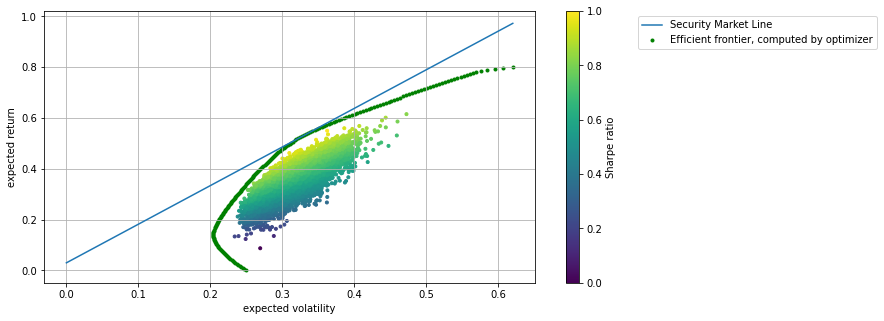

In [10]:
rand2d = np.random.random((10000,NoA))
rand2d = rand2d/rand2d.sum(axis=1,keepdims=1)

retSimulated = rand2d.dot(dfret.mean())*252
volSimulated = np.sqrt(np.diag(rand2d@(dfret.cov() * 252@rand2d.T)))
sharpeSimulated = retSimulated / volSimulated

plt.figure(figsize=(11, 5))
plt.scatter(volSimulated, retSimulated, c=sharpeSimulated, marker='.') # plots random portfolios

plt.scatter(stds, means, c='green', marker='.', label='Efficient frontier, computed by optimizer')
plt.grid(True)

plt.xlabel('expected volatility') # we can incorporate latex with r'$E(\sigma_P)$'
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')
plt.plot(y, CML, label='Security Market Line')
plt.legend(loc='upper left', bbox_to_anchor=(1.2, 1))
plt.show()

Now we can display the optimal portolio weightings according to modern portfolio theory.

The results are reasonable when we consider how well msft, tsla, and aapl over our timeperiod - as well as how poorly the other stocks did relatively.

This portfolio's expected return and volatility lie on the SML and the efficient frontier.

In [11]:
import pandas as pd

display(pd.DataFrame( [dict(zip( tickers, optimizer(MU, COV, means[ind_SR]).round(4)))]))

,msft,tqqq,tsla,spy,aapl,f,twtr,ibm
0,0.2419,0.0,0.2806,0.0,0.4589,0.0,0.0186,0.0


We incorporate the following equations from http://www.math.utah.edu/~zhu/5765.17s/week10.pdf which solve for the optimal portfolio when short selling is permitted, ie we drop the constraint that $\mathbf{x} \geq \mathbb{0}$

$\begin{aligned}
&A=\mathbf{l}^{T} \Sigma^{-1} \mathbf{l}>0 \\
&B=\boldsymbol{\mu}^{T} \Sigma^{-1} \mathbf{l} \\
&C=\mu^{T} \Sigma^{-1} \boldsymbol{\mu}>0
\end{aligned}$

$\mathbf{x}_{\mu}=\left(\frac{C-\mu B}{A C-B^{2}}\right) \Sigma^{-1} \mathbf{l}+\left(\frac{\mu A-B}{A C-B^{2}}\right) \Sigma^{-1} \boldsymbol{\mu}$, where $A C - B^2 > 0$

$\sigma_{P}^{2}(\mu)= \mathbf{x}_{\mu}^T \Sigma \mathbf{x}_{\mu}$

$\sigma_{P}^{2}(\mu)=\frac{A \mu^{2}-2 B \mu+C}{A C-B^{2}}$

$\sigma_{P} = \sqrt{\frac{A \mu^{2}-2 B \mu+C}{A C-B^{2}}}$


In [12]:
l = np.ones_like(MU)
A = l.T@np.linalg.inv(COV)@l
B = MU.T@np.linalg.inv(COV)@l
C = MU.T@np.linalg.inv(COV)@MU

def vol_P(mu_target):
    return (A*mu_target**2-2*B*mu_target+C)/(A*C-B*B)

print(A, B, C)

189.247082565244 10.4454395135079 4.90707220167619


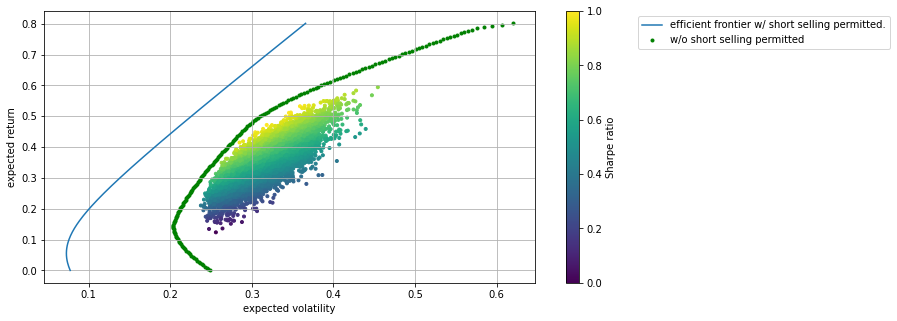

In [13]:
rand2d = np.random.random((10000,NoA))
rand2d = rand2d/rand2d.sum(axis=1,keepdims=1)

retSimulated = rand2d.dot(dfret.mean())*252
volSimulated = np.sqrt(np.diag(rand2d@(dfret.cov() * 252@rand2d.T)))
sharpeSimulated = retSimulated / volSimulated

plt.figure(figsize=(11, 5))
plt.scatter(volSimulated, retSimulated, c=sharpeSimulated, marker='.')

plt.scatter(stds, means, c='green', marker='.', label="w/o short selling permitted")
plt.grid(True)

plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')
x = np.linspace(0, means.max(), samples)
plt.plot(vol_P(x)**.5, x, label="efficient frontier w/ short selling permitted.")

plt.legend(loc='upper left', bbox_to_anchor=(1.2, 1))
plt.show()

### Linear & Quadratic Programming

$$\max \left(\begin{array}{llllll}2 & 1 & 2 & 5 & 7 & 8\end{array}\right) x$$
$$\text{s.t.} $$
$$
\begin{aligned}
&\left(\begin{array}{llllll}
2 & 1 & 2 & 3 & 5 & 4 \\
0 & 1 & 2 & 2 & 1 & 4 \\
3 & 1 & 3 & 2 & 2 & 4
\end{array}\right) x \leq\left(\begin{array}{c}
170 \\
160 \\
95
\end{array}\right) \\
&x \geq \mathbb{0} .
\end{aligned}
$$

In [14]:
import scipy
from scipy.optimize import Bounds, LinearConstraint, minimize
import numpy as np

A = np.array([
    [2, 1, 2, 3, 5, 4],
    [0, 1, 2, 2, 1, 4],
    [3, 1, 3, 2, 2, 4]])

b = np.array([170, 160, 95])

c = [2, 1, 2, 5, 7, 8]

Since scipy.optimize.linprog solves for $\operatorname{min}c^{T}x$ and we are solving for $\operatorname{max}c^{T}x$, we can equivalently solve for $\operatorname{min}{-c}^{T}x \text{  s.t.  } \{\ldots\}$ to get our desired $x$

In [15]:
neg_c = np.zeros_like(c) - c
res = scipy.optimize.linprog(neg_c, A_ub=A, b_ub=b, bounds=(0, None))

x_optimal = res.x
print("Our optimal x is: " + str(x_optimal.round(4)) + ".T")

Our optimal x is: [ 0.      0.      0.     10.5804 21.4732  7.7232].T


We can test a few values to verify optimality:

In [16]:
from itertools import product

items = [0, 1]

ep = 0.001

print(c@x_optimal)

def optimal_scaled(arr, b, c):
    if np.all(A@arr-b < 0 for i in A@arr-b):
        return arr
    else:
        return optimal_scaled(arr*.99999, b, c)

for item in product(items, repeat=6):
    tmp = optimal_scaled((x_optimal+ep*(2*np.array(item)-1)), b, c)
    if c@tmp > c@x_optimal:
        print(A@tmp)



264.99999999142574
[170.001       73.52681618  94.997     ]
[169.997       73.52881618  94.997     ]
[170.007       73.53081618  95.001     ]
[170.005       73.53081618  95.003     ]
[170.001       73.53281618  95.003     ]
[170.003       73.52681618  94.999     ]
[170.011       73.53481618  95.007     ]
[170.003       73.52881618  94.999     ]
[169.999       73.53081618  94.999     ]
[170.001       73.52481618  94.995     ]
[170.009       73.53281618  95.003     ]
[170.007       73.53281618  95.005     ]
[170.003       73.53481618  95.005     ]
[170.005       73.52881618  95.001     ]
[170.013       73.53681618  95.009     ]
[170.005       73.52681618  95.003     ]
[170.001       73.52881618  95.003     ]
[170.003       73.52281618  94.999     ]
[170.011       73.53081618  95.007     ]
[170.009       73.53081618  95.009     ]
[170.005       73.53281618  95.009     ]
[170.007       73.52681618  95.005     ]
[170.015       73.53481618  95.013     ]
[170.007       73.52881618  95.005    

$$\max \quad x^T 
\left(\begin{array}{llllll}
1 & 1 & 3 & 6 & 2 & 4 \\
4 & 4 & 4 & 6 & 5 & 2 \\
1 & 2 & 1 & 5 & 3 & 2 \\
5 & 2 & 6 & 0 & 1 & 1 \\
3 & 4 & 5 & 4 & 4 & 5 \\
1 & 3 & 3 & 5 & 6 & 0
\end{array}\right)x \quad
$$
$$\text{s.t.} $$
$$
\\
\begin{aligned}
&\left(\begin{array}{llllll}
2 & 1 & 2 & 3 & 5 & 4 \\
0 & 1 & 2 & 2 & 1 & 4 \\
3 & 1 & 3 & 2 & 2 & 4
\end{array}\right) x \leq\left(\begin{array}{c}
170 \\
160 \\
95
\end{array}\right) \\
\text{ and } \quad &x = \mathbb{0} .
\end{aligned}
$$

In [17]:
Q = np.array([[1, 1, 3, 0, 2, 4],
       [4, 4, 4, 6, 5, 2],
       [1, 2, 1, 5, 3, 2],
       [5, 2, 6, 0, 1, 1],
       [3, 4, 5, 4, 4, 5],
       [1, 3, 3, 5, 6, 0]])

A = np.array([
    [2, 1, 2, 3, 5, 4],
    [0, 1, 2, 2, 1, 4],
    [3, 1, 3, 2, 2, 4]])

b = np.array([170, 160, 95])

fn = lambda x: (x.T@Q@x) 

res = scipy.optimize.minimize(fn, x0=[0, 0, 0, 0, 0, 0], method='trust-constr',
                        bounds=Bounds(-2,2), constraints=LinearConstraint(A, b, b))

C:\tools\Manim\Lib\site-packages\scipy\optimize\_trustregion_constr\projections.py:181: UserWarning: Singular Jacobian matrix. Using SVD decomposition to perform the factorizations.
  warn('Singular Jacobian matrix. Using SVD decomposition to ' +


In [18]:
print(res.fun)
x = res.x
print(x)
print(x.T@Q@x)

4883.04146362359
[-20.52467588   7.2251241    4.35595478  15.41160092  10.79269218
  22.99892823]
4883.04146362359


### Technical Analysis

https://www.quantconnect.com/docs/algorithm-reference/indicators

https://www.axi.com/int/blog/education/technical-indicators

In [19]:
import pandas_datareader as pdr

tickers = ['msft', 'tqqq']

df = pdr.DataReader(tickers, data_source='yahoo',
                    start='2017-01-01', end='2020-09-28')['Adj Close']

In [20]:
import numpy as np

x = np.arange(941)
y = df["msft"]

arr = np.zeros((2, 941))

arr[0] = x
arr[1] = y

print(arr)

[[  0.           1.           2.         ... 938.         939.
  940.        ]
 [ 57.93053436  57.67133713  57.67133713 ... 200.09403992 204.65350342
  206.24880981]]


In [21]:
# Sum of squared difference S_xy
def S(x, y):
    return np.sum((x-np.mean(x))*(y-np.mean(y)))

beta_1 = S(x,y)/S(x,x)
beta_0 = np.mean(y) - beta_1*np.mean(x)

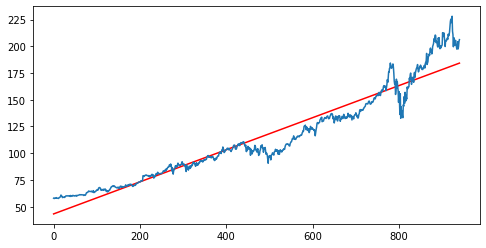

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 4))

x_line = np.linspace(0,940,941)
y_line = beta_1*x+beta_0
plt.plot(x_line, y_line, '-r')
plt.plot(arr[0], arr[1])
#plt.plot(arr[0][0::10], arr[1][0::10])

plt.show()

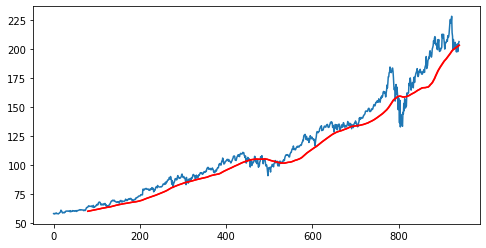

In [23]:
# 1. Moving Average Indicator (MA)

n = 80

ma_method1 = np.convolve(arr[1], np.ones(n)/n, mode='valid')
ma_method2 = y.rolling(window=n).mean()

plt.figure(figsize=(8, 4))
plt.plot(np.arange(len(y)), y)
plt.plot(np.arange(len(ma_method1))+n, ma_method1, '-r')
plt.plot(np.arange(len(ma_method2)), ma_method2, '-r')
plt.show()

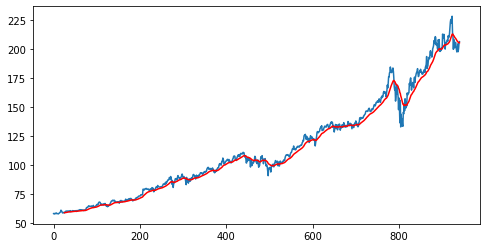

In [24]:
# 2. Exponential Moving Average Indicator (EMA)

n = 26

times = arr[1]
ewma = df['msft'].ewm(span=n, adjust=False, min_periods=n).mean()

plt.figure(figsize=(8, 4))
plt.plot(np.arange(len(y)), y)
plt.plot(np.arange(len(ewma)), ewma, '-r')
plt.show()


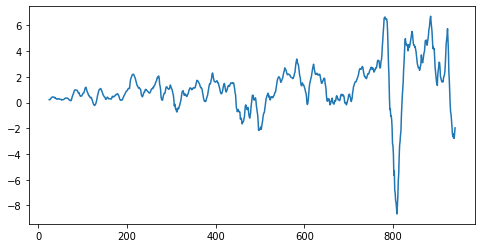

In [25]:
# 3. Moving Average Convergence Divergence (MACD)

ewma_12 = df['msft'].ewm(span=12, adjust=False, min_periods=12).mean()
ewma_26 = df['msft'].ewm(span=26, adjust=False, min_periods=26).mean()

macd = ewma_12 - ewma_26

plt.figure(figsize=(8, 4))
plt.plot(np.arange(len(macd)), macd)
plt.show()

$R S I=100-100 /(1+R S)$


$R S I_{\text {step one }}=100-\left[\frac{100}{1+\frac{\text { Average gain }}{\text { Average loss }}}\right]$

In [26]:
df = pdr.DataReader('msft', data_source='yahoo',
                    start='2017-01-01', end='2020-09-28') 

C:\tools\Manim\Lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\tools\Manim\Lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


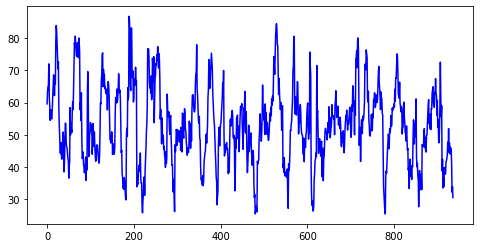

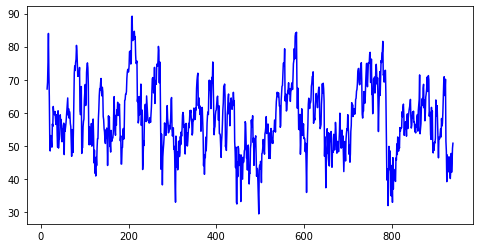

In [27]:
# 4. Relative Strength Index (RSI)

import pandas_ta as ta

n = 14
x = arr[1]

def avg_gain(arr):
    return np.mean(arr[arr >= 0])
    
def avg_loss(arr):
    return np.mean(arr[arr < 0])

RSI = np.zeros(len(x)+100)

for i in range(len(RSI)):
    RSI[i] = 100-100/(1+abs(avg_gain(np.diff(x[i:i+n]) / x[i:i+n][:-1])/
                      avg_loss(np.diff(x[i:i+n]) / x[i:i+n][:-1])))
plt.figure(figsize=(8, 4))
plt.plot(RSI, '-b')
plt.show()

# __________________________ 
rsi = np.array(df[["Close"]].ta.rsi())

plt.figure(figsize=(8, 4))
plt.plot(np.arange(len(rsi)), rsi, '-b')

plt.show()

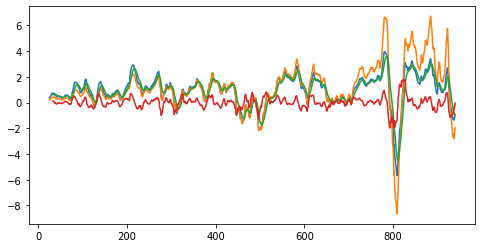

In [28]:
# 5. Percentage Price Oscillator indicator (PPO)

ewma_12 = df['Adj Close'].ewm(span=12, adjust=False, min_periods=12).mean()
ewma_26 = df['Adj Close'].ewm(span=26, adjust=False, min_periods=26).mean()

macd = ewma_12 - ewma_26

PPO = macd/ewma_26*100

PPO_signal = PPO.ewm(span=9, adjust=False, min_periods=9).mean()
PPO_hist = PPO - PPO_signal

plt.figure(figsize=(8, 4))
plt.plot(np.arange(len(PPO)), PPO)
plt.plot(np.arange(len(macd)), macd)
plt.plot(np.arange(len(PPO_signal)), PPO_signal)
plt.plot(np.arange(len(PPO_hist)), PPO_hist)
plt.show()

$S A R_{n+1}=S A R_{n}+\alpha\left(E P-S A R_{n}\right)$

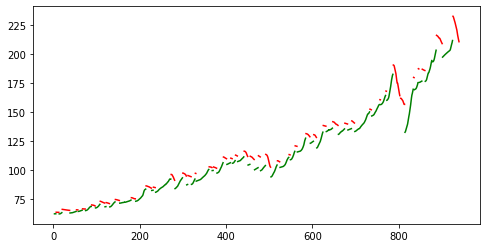

In [29]:
# 6. Parabolic SAR indicator (PSAR)

alpha = 0.1

df = pdr.DataReader('msft', data_source='yahoo',
                    start='2017-01-01', end='2020-09-28') 

psar = ta.psar(high=df['High'], low=df['Low'], close=df['Close'], af0=0.02, af=0.02, max_af=0.2)

plt.figure(figsize=(8, 4))
plt.plot(np.arange(len(psar)), psar['PSARl_0.02_0.2'], '-g')
plt.plot(np.arange(len(psar)), psar['PSARs_0.02_0.2'], '-r')
plt.show()


https://github.com/QuantConnect/Lean/blob/master/Indicators/AverageDirectionalIndex.cs

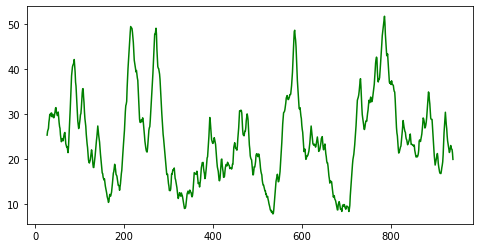

In [30]:
# 7. Average Directional Index (ADX)

adx = df.ta.adx(high=df['High'], low=df['Low'], close=df['Close'])

plt.figure(figsize=(8, 4))
plt.plot(np.arange(len(adx)), adx['ADX_14'], '-g')
#plt.plot(np.arange(len(adx)), adx['DMP_14'], '-r')
#plt.plot(np.arange(len(adx)), adx['DMN_14'], '-b')
#plt.axhline(20,color='red')
#plt.axhline(25,color='red')
plt.show()

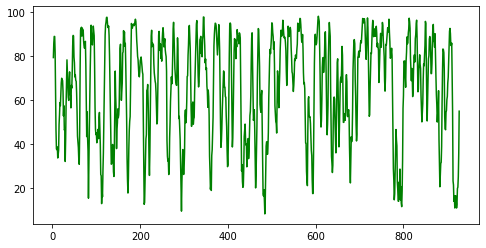

In [31]:
# 8. Stochastic Oscillator Indicator

stoch = df.ta.stoch(high=df['High'], low=df['Low'], close=df['Close'])

plt.figure(figsize=(8, 4))
plt.plot(np.arange(len(stoch)), stoch['STOCHk_14_3_3'], '-g')
#plt.plot(np.arange(len(stoch)), stoch['STOCHd_14_3_3'], '-r')

plt.show()

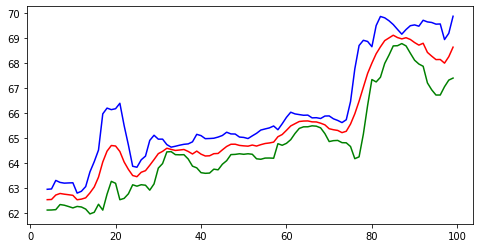

In [32]:
# 9. Bollinger Bands Indicators

#bbands = ta.bbands(high=df['High'], low=df['Low'], close=df['Close'])
bbands = ta.bbands(high=df[0:100]['High'], low=df[0:100]['Low'], close=df[0:100]['Close'])

plt.figure(figsize=(8, 4))
plt.plot(np.arange(len(bbands)), bbands['BBL_5_2.0'], '-g')
plt.plot(np.arange(len(bbands)), bbands['BBM_5_2.0'], '-r')
plt.plot(np.arange(len(bbands)), bbands['BBU_5_2.0'], '-b')
#plt.plot(np.arange(len(bbands)), bbands['BBB_5_2.0'], '-')
#plt.plot(np.arange(len(bbands)), bbands['BBP_5_2.0'], '-y')

plt.show()

Calculation
1. Calculate the SMA for Period $n$
2. Subtract the SMA value from step one from the Close for each of the past $n$ Periods and square them
3. Sum the squares of the differences and divide by $n$
4. Calculate the square root of the result from step three
$\mathrm{SD}=$ Sqrt $\left[\left(\right.\right.$ Sum the $\left.\left.\left((\text { Close for each of the past } n \text { Periods }-n \text { Period SMA for current bar })^{\wedge} 2\right)\right) / n\right]$

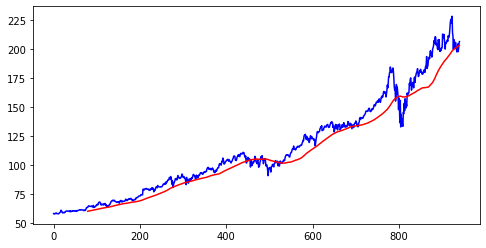

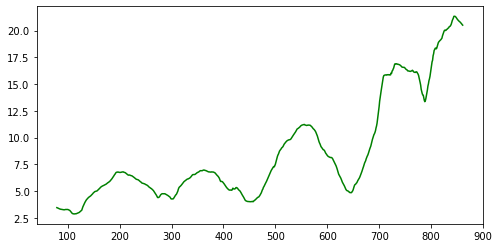

In [33]:
# 10. Standard Deviation Indicator

import scipy
from scipy.spatial.distance import cdist

n = 80

SMA = df['Adj Close'].rolling(window=n).mean()
sdArr = df['Adj Close'].rolling(window=n).std()

diff = np.array(SMA) - np.array(df['Adj Close'])
diff_squared = np.power(diff, 2)

diff_squared_rolling = np.convolve(diff_squared, np.ones(n)/n, mode='valid')
sqrt_dsr = np.power(diff_squared_rolling, 0.5)

plt.figure(figsize=(8, 4))
plt.plot(np.arange(len(df['Adj Close'])), df['Adj Close'], '-b')
plt.plot(np.arange(len(df['Adj Close'])), SMA, '-r')

plt.figure(figsize=(8, 4))
plt.plot(np.arange(len(sqrt_dsr)), sqrt_dsr, '-g')

plt.show()

# Machine Learning

### Principal component analysis (PCA) 

[[-0.56264911 -0.59495932 -0.57397682]
 [ 0.82561176 -0.43994302 -0.35329218]
 [-0.04232262 -0.67266154  0.73873896]]


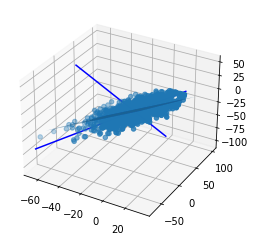

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import random as rd

import pandas as pd

df = pd.read_csv('NotesDataFolder/StudentsPerformance.csv')
df = df[['math score','writing score', 'reading score']]

df = pd.DataFrame(df).to_numpy()

x1 = np.zeros(len(df))
x2 = np.zeros(len(df))
x3 = np.zeros(len(df))

for i in range(len(df)):
    x1[i] = df[i][0]
    x2[i] = df[i][1]
    x3[i] = df[i][2]

x1 = x1 - np.mean(x1)
x2 = x2 - np.mean(x2)
x3 = x3 - np.mean(x3)

df = pd.DataFrame({'Column1': x1, 'Column2': x2, 'Column3': x3})

sm = np.array([[0, 0, 0],
               [0, 0, 0],
               [0, 0, 0]])
for i in range(len(df)):
    sm = sm + np.outer(np.array([x1[i] , x2[i], x3[i]]), np.array([x1[i] , x2[i], x3[i]]))
sm = sm/len(df)

U = np.linalg.svd(sm)[0]
print(U.T)

x_trend = np.linspace(min(x1), max(x1), 100)
y_trend = U.T[0][1]/U.T[0][0]*x_trend

plt.scatter(x1, x2)
plt.plot(x_trend, y_trend, '-b')

#%matplotlib notebook
%matplotlib inline

import random
fig = plt.figure(figsize=(4, 8))
ax = fig.add_subplot(projection='3d')

#plot the plane
xx, yy = np.meshgrid(range(-60, 25), range(-60, 100))
z = xx*U.T[0][2]/U.T[0][0]+yy*U.T[1][2]/U.T[1][0]
ax.plot_surface(xx, yy, z, alpha=0.5)

phi = np.linspace(min(x1), max(x1), 100)
x_t = U.T[0][0]/U.T[0][0]*phi
y_t = U.T[0][1]/U.T[0][0]*phi
z_t = U.T[0][2]/U.T[0][0]*phi

ax.plot(x_t, y_t, z_t, '-b')

phi = np.linspace(min(x1), max(x1), 100)
x_t = U.T[1][0]/U.T[1][0]*phi
y_t = U.T[1][1]/U.T[1][0]*phi
z_t = U.T[1][2]/U.T[1][0]*phi

ax.plot(x_t, y_t, z_t, '-b')

#plot the line
'''phi = np.linspace(min(x1), max(x1), 100)
x_t = U.T[0][0]/U.T[0][0]*phi
y_t = U.T[0][1]/U.T[0][0]*phi
z_t = U.T[0][2]/U.T[0][0]*phi

ax.plot(x_t, y_t, z_t, '-b')
'''

ax.scatter(x1, x2, x3)
plt.show()

### Monte Carlo Simulation

I wrote the price option function, which computes the Black-Scholes option value using a binomial tree, for an assignment for my [Computational Methods in Business and Finance](https://uwflow.com/course/cs335) class at University of Waterloo. It utilizes dynamic programming methods for the American option pricing, though at time of writing there may be some revisions needed for that function.

In [35]:
import numpy as np

def price_option(S0, K, T, r, sigma, opttype, Nsteps, american):
    delt = T/Nsteps;
    # tree parameters
    u = np.exp(sigma * np.sqrt(delt) );
    d = 1./u;
    a = np.exp( r*delt );
    p = (a - d)/(u - d);
    # payoff at t=T
    W = S0 * d**(np.arange(Nsteps,-1,-1)) * u**(np.arange(Nsteps+1))
    # W is column vector of length Nsteps+1
    if opttype == 0:
        W = np.maximum( W - K, 0);
    else:
        W = np.maximum( K - W, 0);
    # backward recursion
    for i in np.arange(Nsteps,0,-1):
        W = np.exp(-r*delt)*( p*W[1:i+1] + (1-p)*W[0:i] )
        if american == 1:
            if opttype == 0:
                S = np.maximum(-K+S0 * d**(np.arange(i,-1,-1)) * u**(np.arange(i+1)), 0)
            else:
                S = np.maximum( K-S0 * d**(np.arange(i-1,-1,-1)) * u**(np.arange(i)), 0)
            W = np.maximum(W, S)
    return str(W[0])

In [36]:
S0 = 90
K = 100
T = 1
r = 0.06
sigma = .12
opttype = 0; # opttype - 0 for a call, otherwise a put
american = 0; # american - 0 for European, otherwise American
Nsteps = 10000

price_option(S0, K, T, r, sigma, opttype, Nsteps, american)

'2.6282042479158183'

### Clustering with KMeans


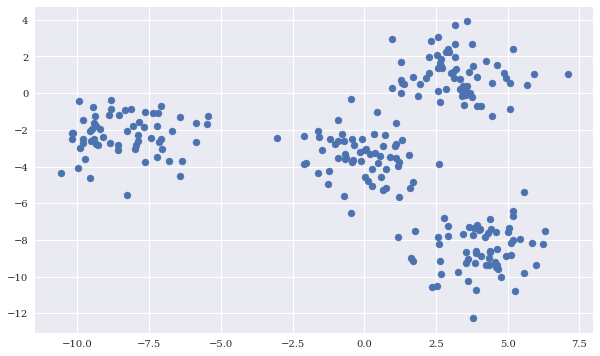

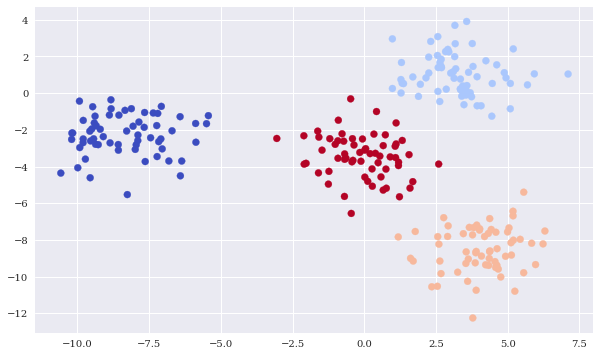

In [37]:
import numpy as np
import pandas as pd
import datetime as dt
from pylab import mpl, plt
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
np.random.seed(1000)
np.set_printoptions(suppress=True, precision=4)
%matplotlib inline

from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=250, centers=4,
random_state=500, cluster_std=1.25)
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], s=50);
from sklearn.cluster import KMeans
model = KMeans(n_clusters=4, random_state=0)
model.fit(X) 

y_kmeans = model.predict(X)
y_kmeans[:12] 
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='coolwarm');

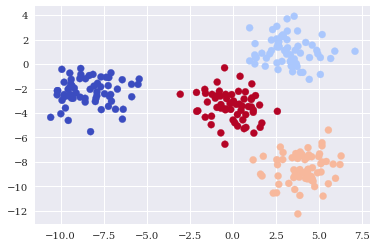

In [38]:
from sklearn.mixture import GaussianMixture
model = GaussianMixture(n_components=4, random_state=0)
model.fit(X)
y_gm = model.predict(X)
y_gm[:12]
(y_gm == y_kmeans).all()
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='coolwarm');

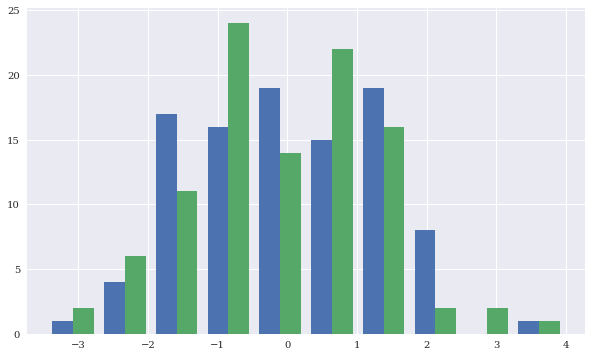

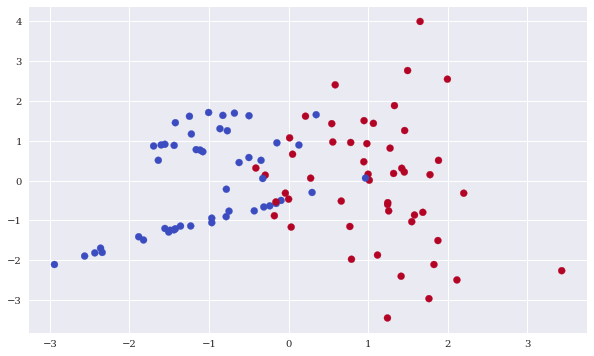

In [39]:
from sklearn.datasets import make_classification
n_samples = 100
X, y = make_classification(n_samples=n_samples, n_features=2,
n_informative=2, n_redundant=0,
n_repeated=0, random_state=250)
X[:5]

X.shape
(100, 2)
y[:5]
y.shape
plt.figure(figsize=(10, 6))
plt.hist(X);
plt.figure(figsize=(10, 6))
plt.scatter(x=X[:, 0], y=X[:, 1], c=y, cmap='coolwarm');


In [40]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

model = GaussianNB()
model.fit(X, y)
    
model.predict_proba(X).round(4)[:5]
pred = model.predict(X)
pred
pred == y
accuracy_score(y, pred)

0.87

#### KMeans on Haidt's Dataset

Text(0.5, 1.0, 'Harm Fairness Sex')

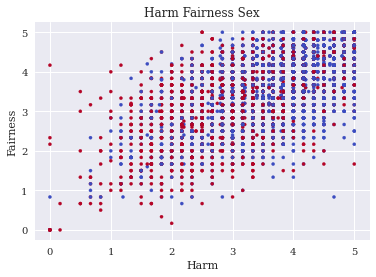

In [41]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

df = pd.read_csv('NotesDataFolder/ALL_MFQ30.csv').dropna(axis='rows')
df = df[df.Sex != '.']
del df['Country']

#  HARM_AVG  FAIRNESS_AVG  INGROUP_AVG  AUTHORITY_AVG  PURITY_AVG Sex
dfx = df[['HARM_AVG', 'FAIRNESS_AVG']].to_numpy()
dfy = df[['Sex']].to_numpy().astype(int)

df = df.to_numpy()

plt.scatter(dfx[:, 0], dfx[:, 1], c=dfy, cmap='coolwarm', s=10);
plt.xlabel('Harm')
plt.ylabel('Fairness')
plt.title('Harm Fairness Sex')

In [42]:
df = pd.read_csv('NotesDataFolder/ALL_MFQ30.csv').dropna(axis='rows')
df = df[df.Sex != '.']
del df['Country']

dfy = df[['Sex']].to_numpy().astype(int)

df = df.to_numpy()

from sklearn.cluster import KMeans
model = KMeans(n_clusters=2, random_state=0)
model.fit(df) 

y_kmeans = model.predict(df)

#plt.figure(figsize=(6, 6))
#plt.scatter(df[:, 0], df[:, 3], c=y_kmeans, cmap='coolwarm');

np.set_printoptions(threshold=np.inf)

a = model.labels_
b = dfy.flatten()



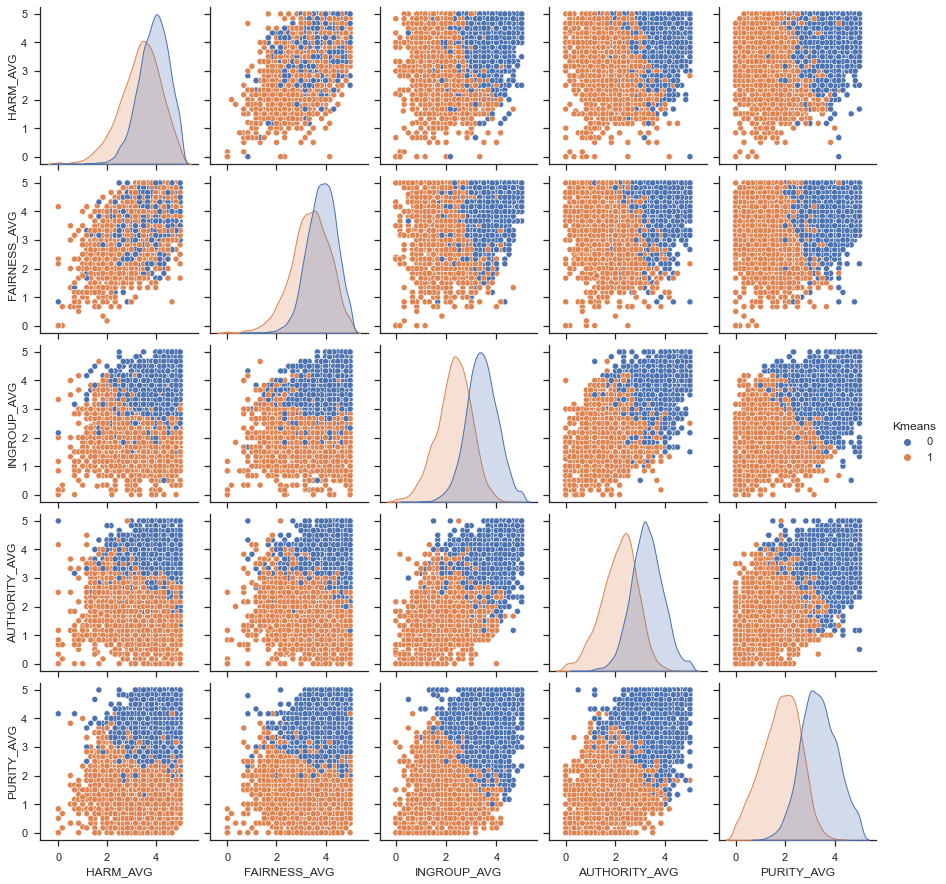

In [43]:
df = pd.read_csv('NotesDataFolder/ALL_MFQ30.csv').dropna(axis='rows')
df = df[df.Sex != '.']
del df['Country']

df['Kmeans'] = a

import seaborn as sns
sns.set_theme(style="ticks")
sns.pairplot(df, hue="Kmeans")

df = df.to_numpy()

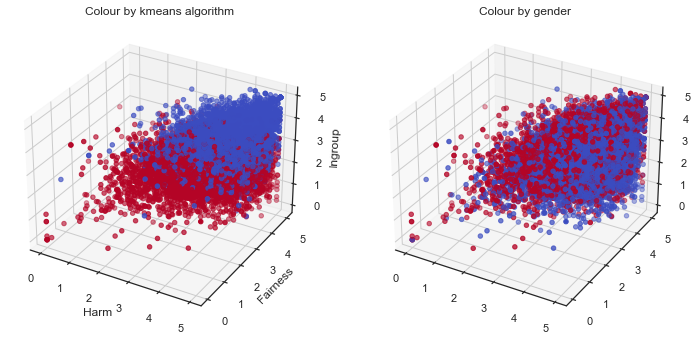

In [44]:
%matplotlib inline
#%matplotlib notebook

fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')

# Plot a basic wireframe
ax1.set_title('Colour by kmeans algorithm')
ax1.scatter(df[:, 0], df[:, 1], df[:, 2], c=a, cmap='coolwarm')
ax1.set_xlabel("Harm")
ax1.set_ylabel("Fairness")
ax1.set_zlabel("Ingroup")


ax2.scatter(df[:, 0], df[:, 1], df[:, 2], c=b, cmap='coolwarm')
ax2.set_title('Colour by gender')

plt.show()

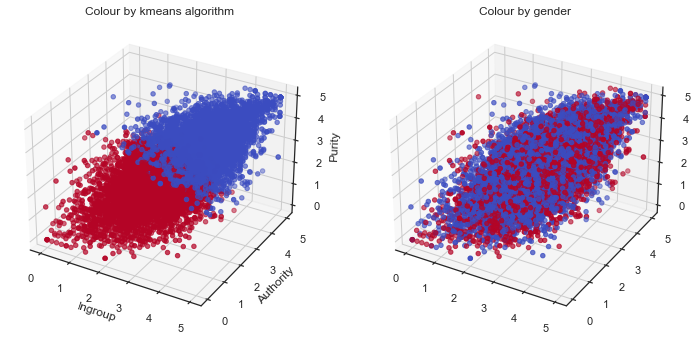

In [45]:
fig = plt.figure(figsize=(12,6))

ax3 = fig.add_subplot(121, projection='3d')
ax4 = fig.add_subplot(122, projection='3d')

ax3.set_title('Colour by kmeans algorithm')
ax3.scatter(df[:, 2], df[:, 3], df[:, 4], c=a, cmap='coolwarm')
ax3.set_xlabel("Ingroup")
ax3.set_ylabel("Authority")
ax3.set_zlabel("Purity")


ax4.scatter(df[:, 2], df[:, 3], df[:, 4], c=b, cmap='coolwarm')
ax4.set_title('Colour by gender')

plt.show()

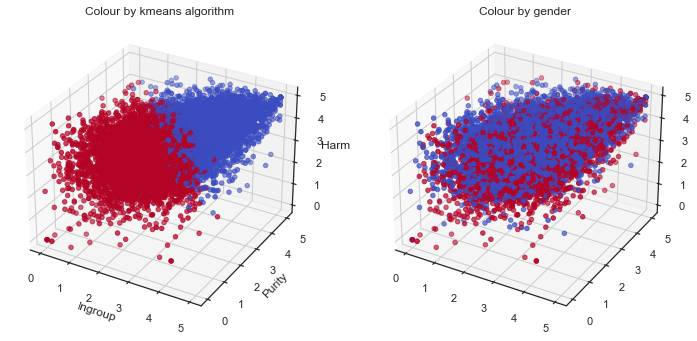

In [46]:
fig = plt.figure(figsize=(12,6))

ax3 = fig.add_subplot(121, projection='3d')
ax4 = fig.add_subplot(122, projection='3d')

ax3.set_title('Colour by kmeans algorithm')
ax3.scatter(df[:, 2], df[:, 4], df[:, 0], c=a, cmap='coolwarm')
ax3.set_xlabel("Ingroup")
ax3.set_ylabel("Purity")
ax3.set_zlabel("Harm")


ax4.scatter(df[:, 2], df[:, 4], df[:, 0], c=b, cmap='coolwarm')
ax4.set_title('Colour by gender')

plt.show()

#### Haidt (day 2)

C:\Python39\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (6,17,18,20,21,22,26,28,29,53,56,64) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


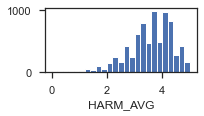

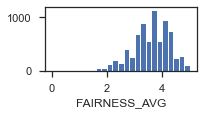

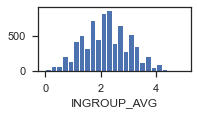

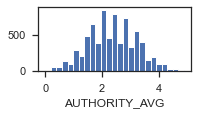

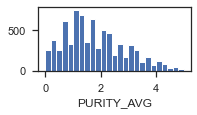

In [47]:
#https://dataverse.harvard.edu/dataset.xhtml?persistentId=hdl:1902.1/12658&studyListingIndex=0_775f45d232bb5e430d0024139e25

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#df = pd.read_csv('GrahamHaidtNosek.2009.JPSP.Study_3.tab', delim_whitespace=True)
df = pd.read_csv('NotesDataFolder/GrahamHaidtNosek.2009.JPSP.Study_3.tab',sep="\t")

df = df[['gender', 'HARM_AVG', 'FAIRNESS_AVG', 'INGROUP_AVG', 'AUTHORITY_AVG', 'PURITY_AVG']]
df.dropna(axis='rows')

arr = df.to_numpy()
arr = arr[ ~np.isnan(arr).any(axis=1),:]
arr = arr.T

for i in range(1, 6):
    plt.subplot(3, 2, i) 

    plt.hist(arr[i], bins=25)
    plt.xlabel(list(df.columns.values)[i])
    plt.show() 

In [48]:
arr = arr.T

for i in range(len(arr.T[0])):
    x_bar = sum(arr[i])-arr[i][0]
    for j in range(1,6):
        arr[i][j] = arr[i][j]/x_bar
        
df1 = pd.DataFrame(arr)
df1.describe()

,0,1,2,3,4,5
count,7457.000000,7457.000000,7457.000000,7457.000000,7457.000000,7457.000000
mean,0.606678,0.270178,0.273340,0.159070,0.172969,0.124444
std,0.488520,0.059624,0.068226,0.047469,0.047793,0.061028
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.230769,0.226804,0.130841,0.144417,0.078652
50%,1.000000,0.268817,0.269231,0.161017,0.175000,0.121495
75%,1.000000,0.307692,0.314961,0.189189,0.203390,0.168142
max,1.000000,0.531250,0.607143,0.500000,0.600000,0.462687


In [49]:
arr = np.delete(arr.T, 0, 0).T

from sklearn.cluster import KMeans
model = KMeans(n_clusters=2, random_state=0)
model.fit(arr) 

#y_kmeans = model.predict(arr)

a = model.labels_

In [50]:
df2 = np.vstack((arr.T,a))
print(df2.size)

44742


Steps to perform KMeans algorithm by hand, taken from: https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/

Step 1: Choose the number of clusters k

Step 2: Select k random points from the data as centroids

Step 3: Assign all the points to the closest cluster centroid

Step 4: Recompute the centroids of newly formed clusters

Step 5: Repeat steps 3 and 4

In [51]:
from random import sample
import numpy.ma as ma

def m2(arrA, arrB):
    return np.sum(np.power((arrA-arrB),2))

def label_closest_centroid_arr(arr, centroid_arr):
    closest_centroid_arr = np.zeros(len(arr), dtype=bool)
    for i in range(len(arr)):
            if m2(arr[i], centroid_arr[0]) < m2(arr[i], centroid_arr[1]):
                closest_centroid_arr[i] = 1
            else: 
                closest_centroid_arr[i] = 0
    return closest_centroid_arr

def return_next_centroid(arr, centroid_arr):
    closest_centroid_arr = label_closest_centroid_arr(arr, centroid_arr)

    x = np.array(arr.T)
    y = np.array(closest_centroid_arr)
    z = np.array(np.invert(closest_centroid_arr))

    centroid_arr[0] = x[:, y].mean(axis=1)
    centroid_arr[1] = x[:, z].mean(axis=1)

    return centroid_arr

def kmeans_iteration():
    k = 2
    s = sample(range(len(arr)), k)

    centroid_arr = [arr[s[0]], arr[s[1]]]
    closest_centroid_arr = np.zeros(len(arr), dtype=bool)
    for i in range(300):
        temp = np.array(return_next_centroid(arr, centroid_arr))
        if m2(temp, centroid_arr) < 0.0001:
            break
        centroid_arr = temp
    return centroid_arr

# Does NOT generalize to more than k=2 clusters
def inertia(arr, centroid_arr):
    sm = 0
    for i in range(len(arr)):
        sm = sm + min(np.linalg.norm(arr[i]-centroid_arr[0].astype(float), ord=2)**2,
                      np.linalg.norm(arr[i]-centroid_arr[1].astype(float), ord=2)**2)
    return sm


for i in range(0, 9):
    min_inertia = float("inf")
    kmi_temp = kmeans_iteration()
    print(inertia(arr, kmi_temp))
    if inertia(arr, kmi_temp) < min_inertia:
        kmi = kmi_temp
        a = label_closest_centroid_arr(arr, kmi).astype(int)
        min_inertia = inertia(arr, kmi)
        
from sklearn.cluster import KMeans
model = KMeans(n_clusters=2, random_state=5)
model.fit(arr) 

y_kmeans = model.predict(arr)

b = model.labels_
print(kmi)
print(m2(a,b))
print(model.cluster_centers_)
print(inertia(arr, model.cluster_centers_))
print(model.inertia_)

93.7909256877491
89.35927572471574
106.44347131882319
77.92316107257922
72.7552634022528
77.35371076700925
73.52379364395955
87.06048866311086
74.30982462540264
[array([0.2367, 0.2219, 0.1714, 0.1907, 0.1793]), array([0.2969, 0.3144, 0.1492, 0.1589, 0.0807])]
6950
[[0.2325 0.2267 0.1817 0.1973 0.1618]
 [0.3128 0.3262 0.1334 0.1454 0.0821]]
71.32697115206257
71.32697115206282


In [52]:
df2 = np.vstack((arr.T,a))
print(df2.size)

44742


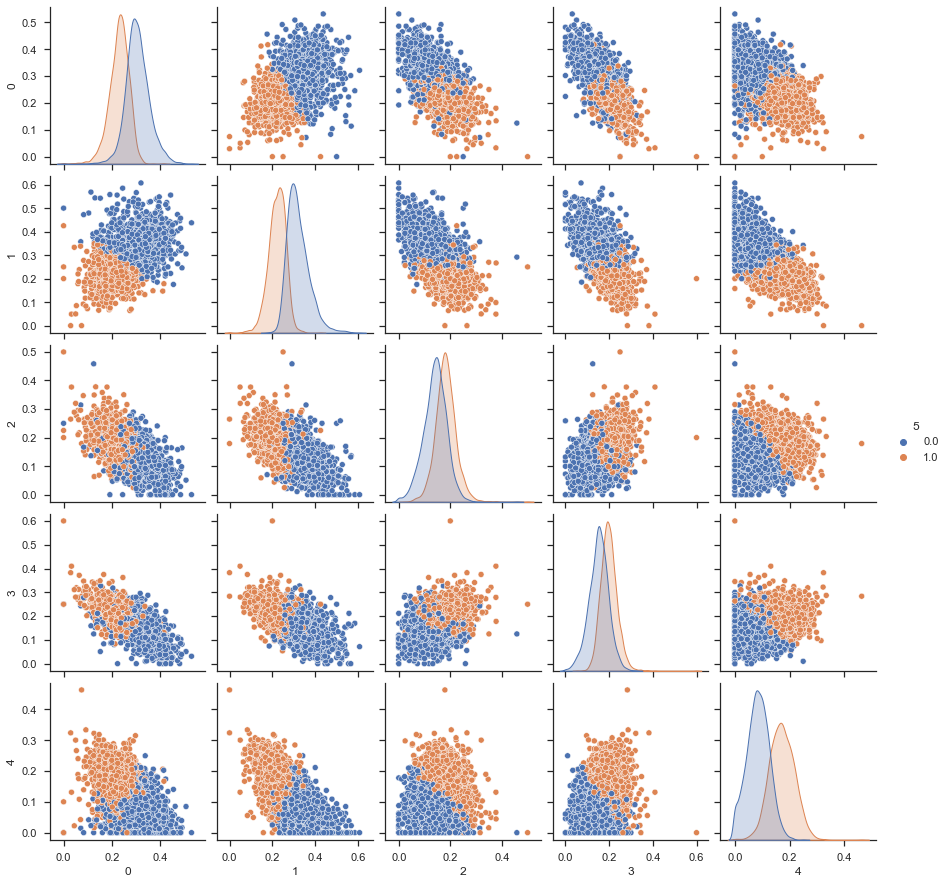

In [53]:
sns.set_theme(style="ticks")
sns.pairplot(pd.DataFrame(df2.T), hue=5)

#### Haidt (day 3)

In [54]:
#https://dataverse.harvard.edu/dataset.xhtml?persistentId=hdl:1902.1/12658&studyListingIndex=0_775f45d232bb5e430d0024139e25

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#df = pd.read_csv('GrahamHaidtNosek.2009.JPSP.Study_3.tab', delim_whitespace=True)
df = pd.read_csv('NotesDataFolder/GrahamHaidtNosek.2009.JPSP.Study_3.tab',sep="\t")

df = df[['gender', 'HARM_AVG', 'FAIRNESS_AVG', 'INGROUP_AVG', 'AUTHORITY_AVG', 'PURITY_AVG']]
df.dropna(axis='rows')

arr = df.to_numpy()
arr = arr[ ~np.isnan(arr).any(axis=1),:]
arr = arr.T

'''for i in range(1, 6):
    plt.subplot(3, 2, i) 

    plt.hist(arr[i], bins=25)
    plt.xlabel(list(df.columns.values)[i])
    plt.show()
'''

C:\Python39\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (6,17,18,20,21,22,26,28,29,53,56,64) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


'for i in range(1, 6):\n    plt.subplot(3, 2, i) \n\n    plt.hist(arr[i], bins=25)\n    plt.xlabel(list(df.columns.values)[i])\n    plt.show()\n'

In [55]:
arr = arr.T

for i in range(len(arr.T[0])):
    x_bar = sum(arr[i])-arr[i][0]
    for j in range(1,6):
        arr[i][j] = arr[i][j]/x_bar
        
df1 = pd.DataFrame(arr)

In [56]:
#sns.set_theme(style="ticks")
#sns.pairplot(df1, hue=0)

In [57]:
#print(np.delete(arr.T, 0, 0).T)
#print(df1)
arr = np.delete(arr.T, 0, 0).T

from sklearn.cluster import KMeans
model = KMeans(n_clusters=2, random_state=0)
model.fit(arr) 

y_kmeans = model.predict(arr)

a = model.labels_

In [58]:
#df2 = np.delete(arr.T, 0, 0)
df2 = np.vstack((arr.T,a))
print(df2.size)

44742


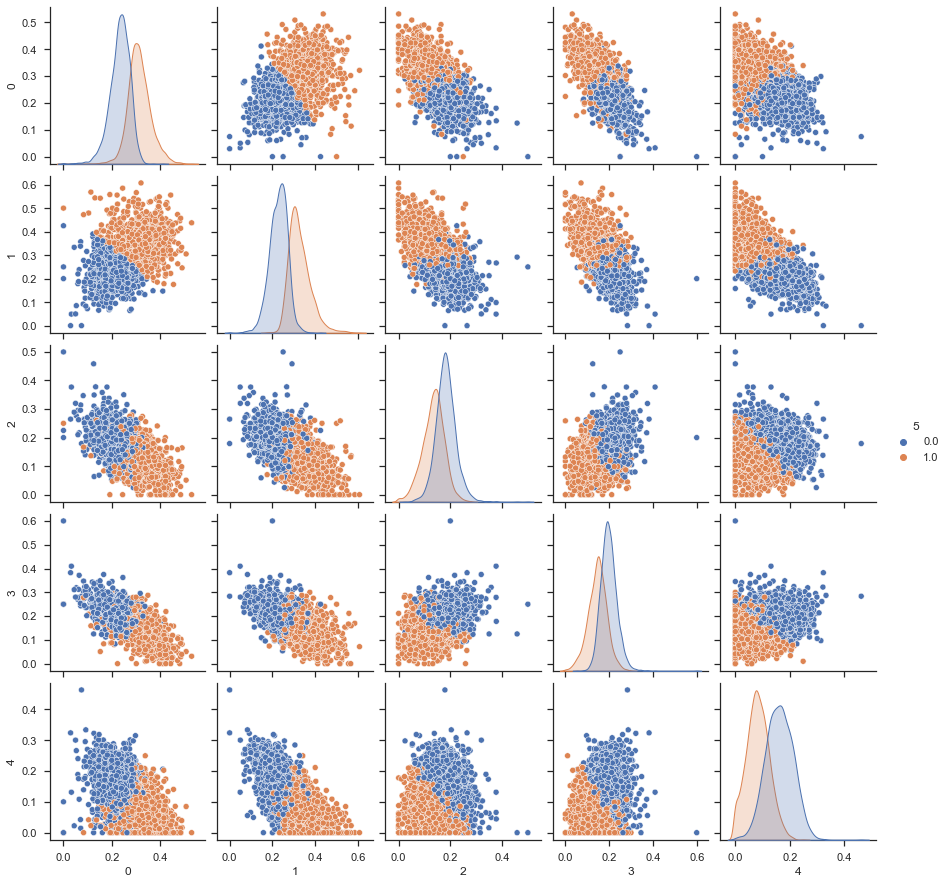

In [59]:
sns.set_theme(style="ticks")
sns.pairplot(pd.DataFrame(df2.T), hue=5)

In [60]:
#https://dataverse.harvard.edu/dataset.xhtml?persistentId=hdl:1902.1/12658&studyListingIndex=0_775f45d232bb5e430d0024139e25

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('NotesDataFolder/GrahamHaidtNosek.2009.JPSP.Study_3.tab',sep="\t")
df = df[['pol_liberal', 'pol_moderate', 'pol_conservative', 'HARM_AVG', 'FAIRNESS_AVG', 'INGROUP_AVG', 'AUTHORITY_AVG', 'PURITY_AVG']]

for i in range(len(list(df.columns))):
    df = df[pd.notnull(df[df.columns[i]])]

df.head(5)

C:\Python39\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (6,17,18,20,21,22,26,28,29,53,56,64) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,pol_liberal,pol_moderate,pol_conservative,HARM_AVG,FAIRNESS_AVG,INGROUP_AVG,AUTHORITY_AVG,PURITY_AVG
21,1.0,0.0,0.0,3.875,4.000,2.000,2.375,1.875
22,0.0,0.0,1.0,3.750,4.000,2.375,3.000,3.125
23,1.0,0.0,0.0,2.750,3.375,0.875,1.500,0.250
24,1.0,0.0,0.0,4.375,2.625,3.500,3.250,2.250
25,0.0,1.0,0.0,4.000,3.625,3.750,2.750,2.000


In [61]:
arr = df.to_numpy()

#print(arr)

print("Liberals:\t " + str(sum((arr.T)[0])))
print("Moderates:\t " + str(sum((arr.T)[1])))
print("Conservatives:\t " + str(sum((arr.T)[2])))

print(len(arr))

pol_arr = ((arr.T)[0:3]).T
mor_arr = ((arr.T)[3:8]).T
con_arr = ((arr.T)[2]).T

mor_arr = mor_arr / np.mean(mor_arr, axis=1)[:,None] - 1

Liberals:	 4275.0
Moderates:	 752.0
Conservatives:	 983.0
6010


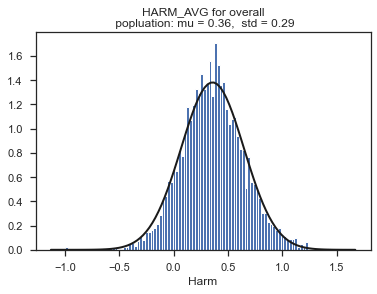

In [62]:
from scipy.stats import norm

plt.hist(mor_arr.T[0], bins=100, density=True)
plt.xlabel("Harm")

mu = np.mean(mor_arr.T[0])
std = np.std(mor_arr.T[0])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "HARM_AVG for overall\n popluation: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

X = mor_arr[0:3000]
y = con_arr[0:3000]

model = LogisticRegression(random_state=0).fit(X, y)

model.score(X, y)

print("Model predicted %d conservatives and %d liberals" %
      (sum(model.predict(mor_arr[3000:])), len(mor_arr[3000:])
       -sum(model.predict(mor_arr[3000:]))))
print("There were %d conservatives and %d liberals" %
      (sum(con_arr[3000:]), sum(1 - con_arr[3000:]))) 

confusion_matrix(model.predict(mor_arr[3000:]), con_arr[3000:])

# 2368 Liberal and liberal
# 266 guessed liberal but was conservative
# 55 vice versa
# 321 guessed conservative and was conservative

Model predicted 376 conservatives and 2634 liberals
There were 587 conservatives and 2423 liberals


array([[2368,  266],
       [  55,  321]], dtype=int64)

### NLP - Carbuying Forum

In [69]:
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
ps = PorterStemmer()

# posts2.txt is 100mb, and is not hosted on GitHub
# posts3.txt however is 500 kB, but will not perform well
filename=open("NotesDataFolder/posts2.txt","r")


tokens = []
for line in filename.readlines():
    tokens +=  [x.lower() for x in nltk.word_tokenize(line.replace("'",""))]

In [71]:
#[x.lower() for x in tokens]
import re
filtered_tokens = [token for token in tokens if re.search('[a-zA-Z|0-9|\.]', token)]
filtered_tokens2 = [t for t in filtered_tokens if len(t) > 1 or t == '.']

In [72]:
from nltk.corpus import stopwords

filtered_tokens3 = []

stop_words = set(stopwords.words("english"))

for word in filtered_tokens2:
    if word.casefold() not in stop_words:
         filtered_tokens3.append(word)
print(filtered_tokens3[1:10])

['hey', 'considering', '2013', 'kia', 'optima', 'hybrid', 'ex', 'trim', '.']


In [73]:
filtered_tokens4 = filtered_tokens3

for i in range(len(filtered_tokens3)):
    filtered_tokens4[i] = filtered_tokens3[i].rstrip('s')


In [76]:
print(filtered_tokens4[:100])

['2022-06-23', 'hey', 'considering', '2013', 'kia', 'optima', 'hybrid', 'ex', 'trim', '.', '124k', 'mile', 'already', '.', 'experience', 'hybrid', 'vehicle', '.', 'sure', 'hybrid', 'battery', 'cause', 'issue', 'near', 'future', 'car', 'gon', 'na', 'last', 'least', 'year', 'without', 'issue', '.', 'love', 'look', 'feel', 'anything', 'keep', 'mind', 'first', 'time', 'car', 'buyer', 'id', 'appreciate', 'help', '2022-06-23', 'currently', '2009', 'matrix', 'xr', '146,000km', 'rust', 'damage', '.', 'bought', 'month', 'ago', '.', 'changed', 'oil', 'put', 'synthetic', '.', 'changed', 'transmission', 'fluid', 'toyota', 'around', 'brake', 'done', 'tire', 'changed', 'spark', 'plug', 'got', 'replace', 'week', '.', 'current', 'problem', 'fuel', 'gauge', 'drove', 'tank', 'empty', 'filled', 'full', 'apparently', 'still', '1/4', 'tank', 'left', 'empty', 'gauge', 'said', 'empty', '.', 'ga']


In [74]:
from more_itertools import split_after

flt5 = list(split_after(filtered_tokens4[1:], lambda x: x == "."))

In [75]:
from gensim.models import Phrases

bigram = Phrases(flt5, min_count=1, threshold=3)

fng = []
for i in range(len(flt5)):
    fng.append(bigram[flt5[i]])

In [77]:
from gensim.models import Word2Vec

model = Word2Vec(sentences=fng, vector_size=200, window=5, min_count=1, workers=4)

In [78]:
print(list(model.wv.key_to_index.keys())[:80])

['.', 'car', 'im', 'would', 'looking', 'get', 'like', 'also', 'one', 'want', 'need', 'new', 'drive', 'good', 'year', 'used', 'vehicle', 'im_looking', 'look', 'something', 'know', 'really', 'buy', 'reliable', 'ive', 'much', 'price', 'mile', 'option', 'think', 'work', 'driving', 'go', 'time', 'thing', 'dont', 'lot', 'well', 'around', 'better', 'model', 'since', 'seem', 'reliability', 'going', 'suv', 'two', 'right', 'budget', 'getting', 'still', 'love', 'mileage', 'that', 'awd', 'currently', 'thought', 'guy', 'fun', 'make', 'http', 'anything', 'manual', 'old', '...', 'price_range', 'amp_x200b', 'would_like', 'le', 'suggestion', 'could', 'even', 'nice', 'truck', 'maybe', 'thank', 'sedan', 'issue', 'little', 'buying']


In [79]:
print(model.wv.most_similar("living_toronto", topn=8))
print("\n")
print(model.wv.most_similar("im_considering", topn=8))

[('located_canada', 0.916853129863739), ('vancouver_bc', 0.9053212404251099), ('male_living', 0.9025725722312927), ('new_brunswick', 0.9001185894012451), ('location_vancouver', 0.8990403413772583), ('toronto_area', 0.8983715772628784), ('im_23f', 0.8981373310089111), ('henderson', 0.8971377015113831)]


[('im_interested', 0.8474637269973755), ('im_thinking', 0.819386899471283), ('im_torn', 0.8149383068084717), ('im_debating', 0.8039095997810364), ('ive_considered', 0.7620350122451782), ('im_stuck', 0.7164387702941895), ('originally_thinking', 0.714503824710846), ('debating', 0.7144978642463684)]


### Regression

$r=\frac{\sum\left(x_{i}-\bar{x}\right)\left(y_{i}-\bar{y}\right)}{\sqrt{\sum\left(x_{i}-\bar{x}\right)^{2} \sum\left(y_{i}-\bar{y}\right)^{2}}}$

$r=\frac{\operatorname{cov}(X, Y)}{\sigma_{X} \sigma_{Y}}$

$y_{i}=\beta_{0}+\beta_{1} x_{i}+\epsilon_{i} \quad i=1, \ldots, n$

find $\hat{\beta}_{0}, \hat{\beta}_{1}$ that minimizes the sum of squares of the errors $\sum_{i=1}^{n} \epsilon_{i}^{2}$. Ie minimize

$S\left(\beta_{0}, \beta_{1}\right)=\sum_{i=1}^{n} \epsilon_{i}^{2}=\sum_{i=1}^{n}\left[y_{i}-\left(\beta_{0}+\beta_{1} x_{i}\right)\right]^{2}$

$\frac{\partial S}{\partial \beta_{0}}=-2 \sum_{i=1}^{n} \left(y_{i}-\left(\beta_{0}+\beta_{1} x_{i}\right)\right)=0$

$\frac{\partial S}{\partial \beta_{1}}=-2 \sum_{i=1}^{n} x_{i}\left[y_{i}-\left(\beta_{0}+\beta_{1} x_{i}\right)\right]=0$

Rearranging first we get

$\sum_{n=1}^{n} y_{i}=n \hat{\beta}_{0}+\sum_{n=1}^{n} x_{i} \hat{\beta}_{1}$

$\hat{\beta}_{0}=\bar{y}-\hat{\beta}_{1} \bar{x}$

And second we get 

$\sum_{n=1}^{n} x_{i} y_{i}=\sum_{i=1}^{n} x_{i} \hat{\beta}_{0}+\sum_{n=1}^{n} x_{i}^{2} \hat{\beta}_{1}$

$\hat{\beta}_{1} = \frac{\sum_{n=1}^{n} x_{i} y_{i}-\sum_{i=1}^{n} x_{i} \hat{\beta}_{0}}{\sum_{n=1}^{n} x_{i}^{2}}$

$\frac{\partial S}{\partial \beta_{1}}=-2 \sum_{i=1}^{n} x_{i}\left[y_{i}-\left(\bar{y}-\hat{\beta}_{1} \bar{x}+\beta_{1} x_{i}\right)\right]=0$

$\sum_{i=1}^{n} x_{i} y_{i} = \sum x_i \bar{y}+\hat{\beta}_{1} \sum_{i=1}^{n}x_i(x_{i} - \bar{x})$

$\hat{\beta}_1 = \frac{\sum_{i=1}^{n} x_{i} y_{i}-\sum x_{i} \bar{y}}{\sum_{i=1}^{n} x_{i}\left(x_{i}-\bar{x}\right)}$

$\hat{\beta}_1 = \frac{\sum_{i=1}^{n} (x_{i} - \bar{x}) y_{i}-\sum (x_{i} - \bar{x}) \bar{y}}{\sum_{i=1}^{n} (x_{i} - \bar{x})\left(x_{i}-\bar{x}\right)}=\frac{\sum\left(x_{i}-\bar{x}\right)\left(y_{i}-\bar{y}\right)}{\sum\left(x_{i}-\bar{x}\right)^{2}} = \frac{S_{x y}}{S_{x x}}$

Thus we get

$\hat{\beta}_{0}=\bar{y}-\hat{\beta}_{1} \bar{x}$

$\hat{\beta}_{1}=\frac{S_{x y}}{S_{x x}}$

In [80]:
import pandas_datareader as pdr

tickers = ['msft', 'tqqq']

df = pdr.DataReader(tickers, data_source='yahoo',
                    start='2017-01-01', end='2020-09-28')['Adj Close']

In [83]:
import numpy as np

x = np.arange(941)
y = df["msft"]

arr = np.full((2, 941), 0)

arr[0] = x
arr[1] = y

In [84]:
# Sum of squared difference S_xy
def S(x, y):
    return np.sum((x-np.mean(x))*(y-np.mean(y)))

beta_1 = S(x,y)/S(x,x)
beta_0 = np.mean(y) - beta_1*np.mean(x)



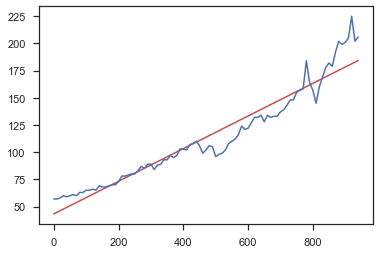

In [85]:
import matplotlib.pyplot as plt

x = np.linspace(0,940,941)
y = beta_1*x+beta_0
plt.plot(x, y, '-r')
plt.plot(arr[0][0::10], arr[1][0::10])

plt.show()

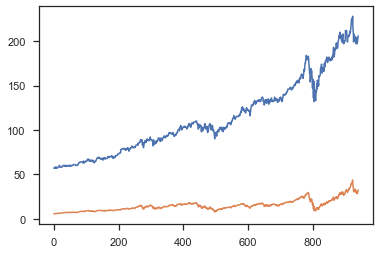

In [86]:
arr4 = np.concatenate((arr, [np.array(df["tqqq"])]), axis=0)

plt.plot(arr4[0],arr4[1])
plt.plot(arr4[0],arr4[2])
plt.show()

n observations and p explanitory covariates:

$S\left(\beta_{0}, \beta_{1}, \ldots, \beta_{p}\right)=\sum\left[y_{i}-\left(\beta_{0}+\beta_{1} x_{i 1}+\ldots+\beta_{p} x_{i p}\right)\right]^{2}$

Setting partials to $0$:

$\begin{aligned}
&\frac{\partial S}{\partial \beta_{0}}=-2 \sum x_{i 0}\left[y_{i}-\left(\beta_{0}+\beta_{1} x_{i 1}+\ldots+\beta_{p} x_{i p}\right)\right]=0 \\
&\frac{\partial S}{\partial \beta_{1}}=-2 \sum x_{i 1}\left[y_{i}-\left(\beta_{0}+\beta_{1} x_{i 1}+\ldots+\beta_{p} x_{i p}\right)\right]=0 \\
&\vdots \\
&\frac{\partial S}{\partial \beta_{p}}=-2 \sum x_{i p}\left[y_{i}-\left(\beta_{0}+\beta_{1} x_{i 1}+\ldots+\beta_{p} x_{i p}\right)\right]=0
\end{aligned}$

$\begin{aligned}
&\left(\sum_{i=1}^n x_{i 0}^2\right)\beta_{0}+\left(\sum_{i=1}^n x_{i 0} x_{i 1}\right) \beta_{1}+\ldots+\left(\sum_{i=1}^n x_{i 0} x_{i p}\right) \beta_{p}=\sum_{i=1}^n x_{i 0} y_{i} \\
&\left(\sum_{i=1}^n x_{i 0} x_{i 1}\right) \beta_{0}+\left(\sum_{i=1}^n x_{i 1}^{2}\right) \beta_{1}+\ldots+\left(\sum_{i=1}^n x_{i 1} x_{i p}\right) \beta_{p}=\sum_{i=1}^n x_{i 1} y_{i} \\
&\vdots \\
&\left(\sum_{i=1}^n x_{i 0} x_{i p}\right) \beta_{0}+\left(\sum_{i=1}^n x_{i 1} x_{i p}\right) \beta_{1}+\ldots+\left(\sum_{i=1}^n x_{i p}^{2}\right) \beta_{p}=\sum_{i=1}^n x_{i p} y_{i}
\end{aligned}$

$X^T X \hat{\beta} = X^Ty$

$\hat{\beta} = \left(X^{T} X\right)^{-1} X^{T} y$, assuming $X$ is non-singular

$y$ is $n$ x $1$

$X$ is $n$ x $(p+1)$,  

$\beta$ is $(p+1)$ x $1$

$X^T X$ is $p+1$ by $p+1$

### simple Neural Net

In [87]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(16, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(16, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 4s 1ms/step - loss: 0.5012 - accuracy: 0.8593
Epoch 2/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2447 - accuracy: 0.9295
Epoch 3/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2101 - accuracy: 0.9383


In [88]:
val_loss = model.evaluate(x_test, y_test)[0]
val_acc = model.evaluate(x_test, y_test)[1]
print(val_loss, val_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.2076 - accuracy: 0.9396
0.20760862529277802 0.9395999908447266


In [89]:
predictions = model.predict([x_train])

1875/1875 [==============================] - 2s 1ms/step


1


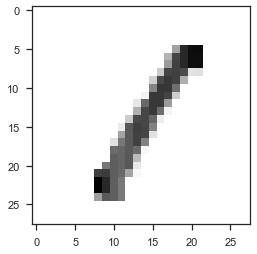

In [90]:
import matplotlib.pyplot as plt

import numpy as np

print(np.argmax(predictions[3]))

plt.imshow(x_train[3], cmap=plt.cm.binary)
plt.show()

In [91]:
#w = model.get_layer('flatten').get_weights()
#np.array(w[0]).shape
#print(w[0][0])

#m = np.array_split(w[0].T[11], 28)

#plt.imshow(m, cmap=plt.cm.binary)
#plt.show()

In [92]:
"""d4 = model.get_layer('dense_3').get_weights()

print(d4[0][0])

for i in range(16):
    md4 = np.array_split(d4[0].T[i], 28)
    plt.imshow(md4)
    plt.show()"""

"d4 = model.get_layer('dense_3').get_weights()\n\nprint(d4[0][0])\n\nfor i in range(16):\n    md4 = np.array_split(d4[0].T[i], 28)\n    plt.imshow(md4)\n    plt.show()"

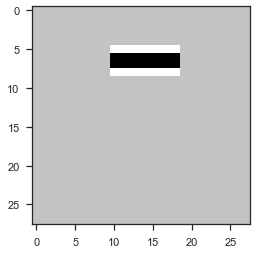

In [93]:
topEdge = np.zeros(784, dtype=float)

for i in range(len(topEdge)):
    if i % 28 in range(10, 19) and i // 28 in range(6, 8):
        topEdge[i] = 1
    if i % 28 in range(10, 19) and i // 28 in [5, 8]:
        topEdge[i] = -.3


plt.imshow(np.array_split(topEdge, 28), cmap=plt.cm.binary)
plt.show()

In [94]:
leftEdge = np.zeros(784, dtype=float)

for i in range(len(leftEdge)):
    if i // 28 in range(10, 19) and i % 28 in range(6, 8):
        leftEdge[i] = 1
    if i // 28 in range(10, 19) and i % 28 in [5, 8]:
        leftEdge[i] = -.3

In [95]:
rightEdge = np.zeros(784, dtype=float)

for i in range(len(rightEdge)):
    if i // 28 in range(10, 19) and i % 28 in range(17, 19):
        rightEdge[i] = 1
    if i // 28 in range(10, 19) and i % 28 in [16, 19]:
        rightEdge[i] = -.3

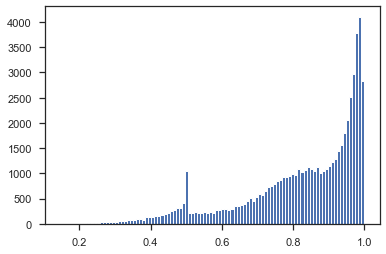

In [96]:
import math

def sigmoid(x):
  return 1 / (1 + math.exp(-x))

sigmoid(x_train[0].flatten()@topEdge.flatten())

tempArr = []
for i in range(len(x_train)):
    tempArr.append(sigmoid(x_train[i].flatten()@topEdge.flatten()))

tempArr = np.array(tempArr)
    
plt.hist(tempArr, bins=100)
plt.show()


In [97]:
np.array([0, 0, 0, 0, 1, 0, 0, 0])

def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)

#softmax()

0.13331666666666667


(array([18.,  0., 19.,  0.,  0.,  0.,  0.,  6.,  0.,  7.]),
 array([4. , 4.4, 4.8, 5.2, 5.6, 6. , 6.4, 6.8, 7.2, 7.6, 8. ]),
 <BarContainer object of 10 artists>)

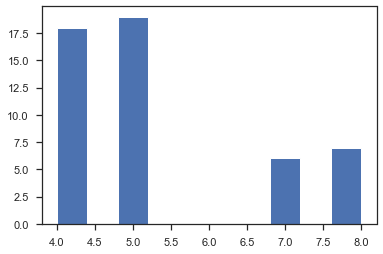

In [98]:
def pdt(k):
    l1 = x_train[k].flatten()
    
    l2 = np.array([[sigmoid(l1 @ topEdge)],
             [sigmoid(l1 @ leftEdge)],
                  [sigmoid(l1 @ rightEdge)]])
    
    l3 = np.array([[0, 0, 0], #0
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0], #3
          [0, 1.22, 0],
          [1.05, 0, 0],
          [0, 0, 0], #6
          [.5, 0, .5],
          [.4,.3, .4], #8
          [0,0,0]])

    return np.argmax(l2.T @ l3.T)

m = 0
for i in range(len(x_train)):
    if y_train[i] == pdt(i):
        m += 1
        
print(m / len(x_train))




tmpArr = []
for i in range(1000, 1050):
    #print(pdt(i))
    #plt.imshow(x_train[i], cmap=plt.cm.binary)
    #plt.show()
    tmpArr.append(pdt(i))

plt.hist(tmpArr)

### K-Nearest Neighbors

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [101]:
from sklearn import datasets
iris = datasets.load_iris()

In [102]:
#print(iris['data'][:5,:])
#print(iris['target'][:5])

In [103]:
from sklearn.utils import shuffle
import numpy as np

X = np.array(iris['data'])
y = np.array(iris['target'])
X, y = shuffle(X, y)

In [104]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=0)

In [105]:
from scipy import stats
    
def K_nearest(p, K):
    dist_from_p = np.linalg.norm(p*np.ones_like(X_train) - X_train, axis=1)
    nearest_to_p_indices = np.argsort(dist_from_p)[:K]
    mode = stats.mode(y_train[nearest_to_p_indices])[0][0]
    return mode

def annotate_KNN(K, max_iter=float('inf')):
    for i in range(len(X_test)):
        if i >= max_iter:
            return        
        prd = K_nearest(X_test[i], K)
        lab = y_test[i]
        if prd == lab:
            print("\x1B[30mK nearest prediction: " + str(prd) +
                  "\t Actual label " + str(lab))
        else:
            print("\x1b[31mK nearest prediction: " + str(prd) +
                  "\t Actual label " + str(lab))
    return

def accuracy_KNN(K):
    acc = np.zeros_like(y_test)
    for i in range(len(X_test)):
        prd = K_nearest(X_test[i], K)
        lab = y_test[i]
        if prd == lab:
            acc[i] = 1
    return np.sum(acc)/len(acc)

In [106]:
annotate_KNN(2, 10)

K nearest prediction: 1	 Actual label 1
K nearest prediction: 2	 Actual label 2
K nearest prediction: 1	 Actual label 1
K nearest prediction: 2	 Actual label 2
K nearest prediction: 1	 Actual label 1
K nearest prediction: 2	 Actual label 2
K nearest prediction: 2	 Actual label 2
K nearest prediction: 0	 Actual label 0
K nearest prediction: 2	 Actual label 2
K nearest prediction: 1	 Actual label 1


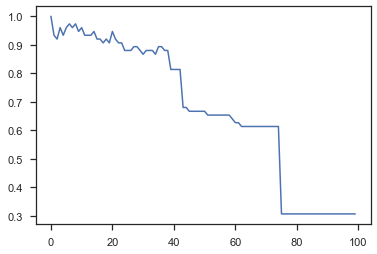

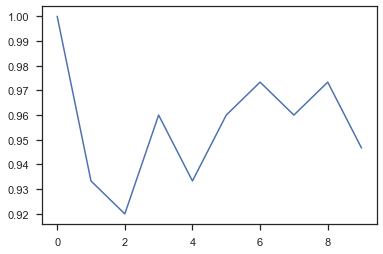

In [107]:
acc_arr = np.ones(100)
for i in range(1, len(acc_arr)):
    acc_arr[i] = accuracy_KNN(i)

plt.plot(acc_arr)
plt.show()

acc_arr = np.ones(10)
for i in range(1, len(acc_arr)):
    acc_arr[i] = accuracy_KNN(i)

plt.plot(acc_arr)
plt.show()